In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/Administrator/Desktop/DataTrained/Data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Summary statistics

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
y = data['quality']               # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)           # check correctness

(1599,) (1599, 11)


## Visualize data through plots

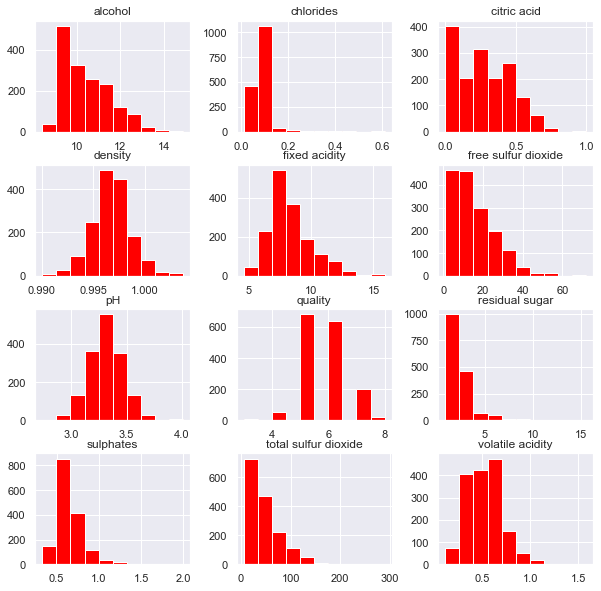

In [7]:
sns.set()
data.hist(figsize=(10,10), color='red')
plt.show()

#### Quality are in discrete numbers, and not a continous variable. Most of the wine are rated '5' & '6', with much fewer in the other numbers. Let's look at the correlation among the variables using Correlation chart.

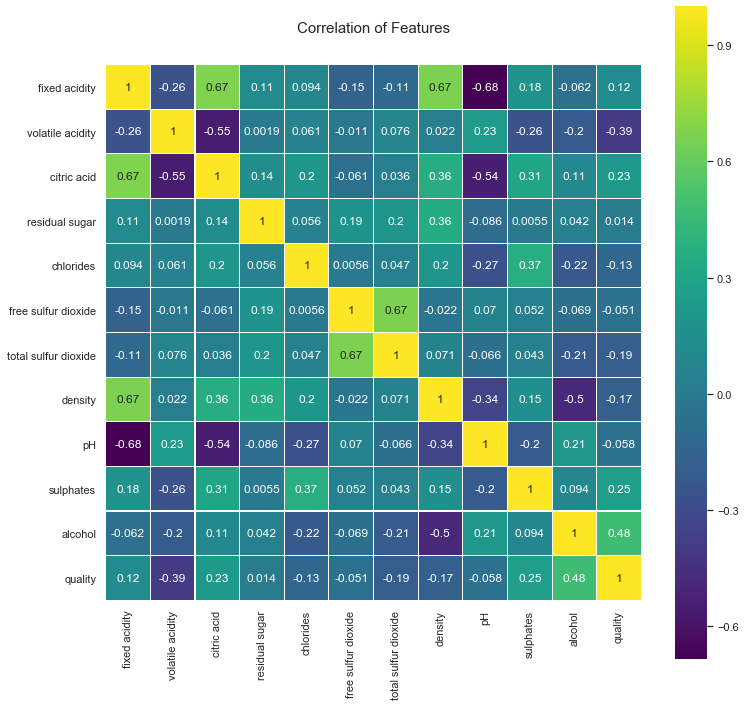

In [8]:
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True, cmap='viridis')

#### Observations:
- Alcohol has the highest correlation with wine quality, followed by the various acidity, sulphates, density & chlorides.
- Let's use all the features in the classifiers.

## Grouping the wine into two groups; with 'quality' > 5 as "good wine"

In [9]:
# Create a new y1
y1 = (y > 5).astype(int)
y1.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

Text(0.5, 0, 'aggregated target value')

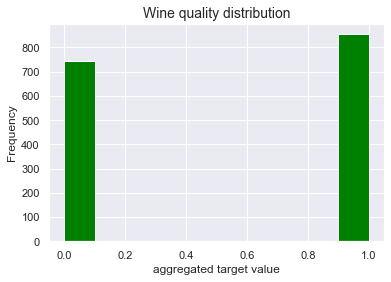

In [10]:
# plotting histogram
ax = y1.plot.hist(color='green')
ax.set_title('Wine quality distribution', fontsize=14)
ax.set_xlabel('aggregated target value')

## Using Random Forest Classifier to train a prediction model

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

### Splitting data into training and test datasets

In [12]:
seed = 8 # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=seed)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


### Training and evaluating the Random Forest Classifier with Cross Validation

In [15]:
# Instantiating the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=seed)
RF_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [16]:
# Computing k-fold cross validation on training dataset and see mean accuracy score
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-pa

The accuracy scores for the iterations are [0.82945736 0.7751938  0.81395349 0.796875   0.71875    0.703125
 0.80314961 0.77952756 0.75590551 0.81889764]
The mean accuracy score is 0.7794834966123421


## Performing predictions

In [17]:
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
# Printing 5 results
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_RF[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  1
Actual wine quality is  1  and predicted is  1
Actual wine quality is  1  and predicted is  1
Actual wine quality is  1  and predicted is  1


#### The first five predictions look ok. Out of first five, there is one mistake. Let's look at the metrics.

## Accuracy, log loss and confusion matrix

In [19]:
print(accuracy_score(y_test, pred_RF))
print(log_loss(y_test, pred_RF))

0.79375
7.1236850999995625


In [20]:
print(confusion_matrix(y_test, pred_RF))

[[126  25]
 [ 41 128]]


#### There is a total of 66 classification errors.

## Let's fit a Logistic Regression model as a classifier

In [21]:
# Import and istantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=seed)
LR_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=8, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Train and evaluate the Logistic Regression Classifier with Cross Validation

In [22]:
# Compute cross validation scores on training dataset and see mean score
cv_scores = cross_val_score(LR_clf, X_train, y_train, cv=10, scoring='accuracy')
print('The cv scores from the iterations are {}'.format(cv_scores))
print('The mean cv score is {}'.format(cv_scores.mean()))

The cv scores from the iterations are [0.75968992 0.75193798 0.79844961 0.7578125  0.7265625  0.6953125
 0.7007874  0.69291339 0.74015748 0.78740157]
The mean cv score is 0.7411024861899531


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

## Perform predictions

In [23]:
LR_clf.fit(X_train, y_train)
pred_LR = LR_clf.predict(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# Print 5 results to see
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_LR[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  0
Actual wine quality is  1  and predicted is  0
Actual wine quality is  1  and predicted is  1


#### Out of the first five predictions, there are already two classification errors.

## Accuracy, log loss and confusion matrix

In [25]:
print(accuracy_score(y_test, pred_LR))
print(log_loss(y_test, pred_LR))

0.746875
8.742717729672663


In [26]:
print(confusion_matrix(y_test, pred_LR))

[[115  36]
 [ 45 124]]


#### There is a total of 81 classification errors.
#### Compared to the Logistic Regression classifier, the Random Forest classifier is better in this case.

## Let's tune hyperparameters of the Random Forest classifier

In [27]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_RF = GridSearchCV(RF_clf,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=8,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [28]:
grid_RF.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

#### Other than number of estimators, the other recommended values are the defaults.

In [29]:
RF_clf = RandomForestClassifier(n_estimators=100,random_state=seed)
RF_clf.fit(X_train,y_train)
pred_RF = RF_clf.predict(X_test)

In [30]:
print(accuracy_score(y_test,pred_RF))
print(log_loss(y_test,pred_RF))

0.825
6.044345838916635


In [31]:
print(confusion_matrix(y_test,pred_RF))

[[127  24]
 [ 32 137]]


#### With hyperparameter tuning, the accuracy of the RF classifier has improved to 82.5% with a corresponding reduction in the log loss value. The number of classification errors are also reduced to 56.

# End Remarks
### A prediction accuracy of 82.5% looks reasonable to use the Random Forest Classifier as a basic recommender to classify a red wine as "recommended" (6 & above quality rating) or "not recommended" (5 & below quality rating).